<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/ML-projects-new/blob/main/Net_ml_hw5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

# Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

# Этапы работы:

## 1 Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns


from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [210]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [211]:
import sklearn

In [212]:
from sklearn import datasets

data = datasets.fetch_california_housing()
print(data)

df = pd.DataFrame(data=data['data'], columns = data['feature_names'])

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

## 2 Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [213]:
df.shape

(20640, 8)

In [214]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


## 3 Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [216]:
features = data.feature_names

In [217]:
X = df
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


#### **Замечание**: *датасет из sklearn не полный*! Поэтому будем считывать столбец из данных, предсталенных на kaggle
https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download

In [218]:
data1 = pd.read_csv('housing.csv')
data1.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [219]:
Y = data1.median_house_value
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [220]:
df = pd.DataFrame(X, columns=features)
df['target_names'] = Y

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_names
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


In [221]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

In [222]:
# Y = df['MedHouseVal']

In [223]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## 4 Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [224]:
pred = lr.predict(X)

In [225]:
pred_df = pd.DataFrame({
    'ground truth': Y,
    'prediction': pred
})

pred_df

,ground truth,prediction
0,452600.0,413164.982708
1,358500.0,397660.643870
2,352100.0,367657.094107
3,341300.0,324159.849583
4,342200.0,241358.743502
...,...,...
20635,78100.0,13365.579568
20636,77100.0,55352.833089
20637,92300.0,17125.140812
20638,84700.0,31910.523524


In [226]:
from sklearn.metrics import mean_squared_error

In [268]:
rmse1 = np.sqrt(mean_squared_error(pred_df['ground truth'], pred_df['prediction']))
rmse1

72410.01216576387

In [270]:
from sklearn.metrics import r2_score

r2_score1 = r2_score(pred_df['ground truth'], pred_df['prediction'])
r2_score1

0.606232685199805

In [ ]:
rmse1
r2_score1

## 5 Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

In [229]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass

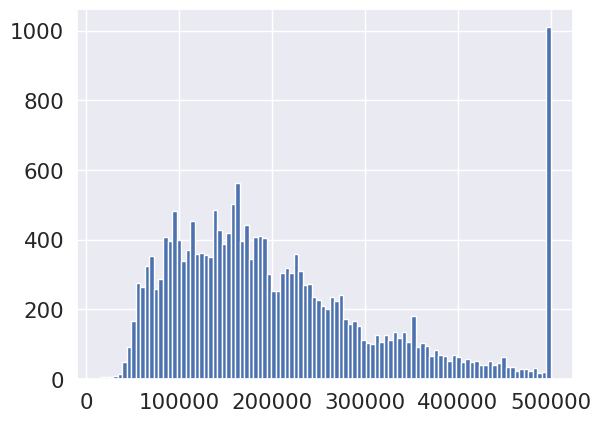

In [230]:
data1['median_house_value'].hist(bins=100)
plt.show()

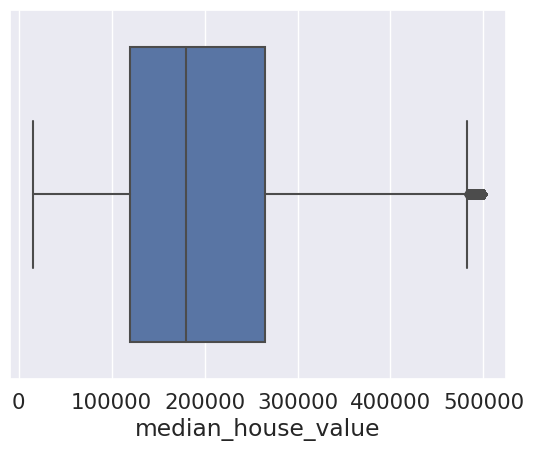

In [231]:
get_boxplot(data1, columns=['median_house_value'])

#### **Вывод**: выбросы присутствуют

## 6 Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

In [232]:
import matplotlib.pyplot as plt

In [233]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_names
MedInc,1.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.7
HouseAge,0.0,1.0,0.0,0.0,-0.3,0.0,0.0,0.0,0.0
AveRooms,0.3,0.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0
AveBedrms,0.0,0.0,0.8,1.0,0.0,0.0,0.0,0.0,0.0
Population,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AveOccup,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Latitude,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.9,0.0
Longitude,0.0,0.0,0.0,0.0,0.0,0.0,-0.9,1.0,0.0
target_names,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Text(0.5, 1.0, 'Correlation matrix')

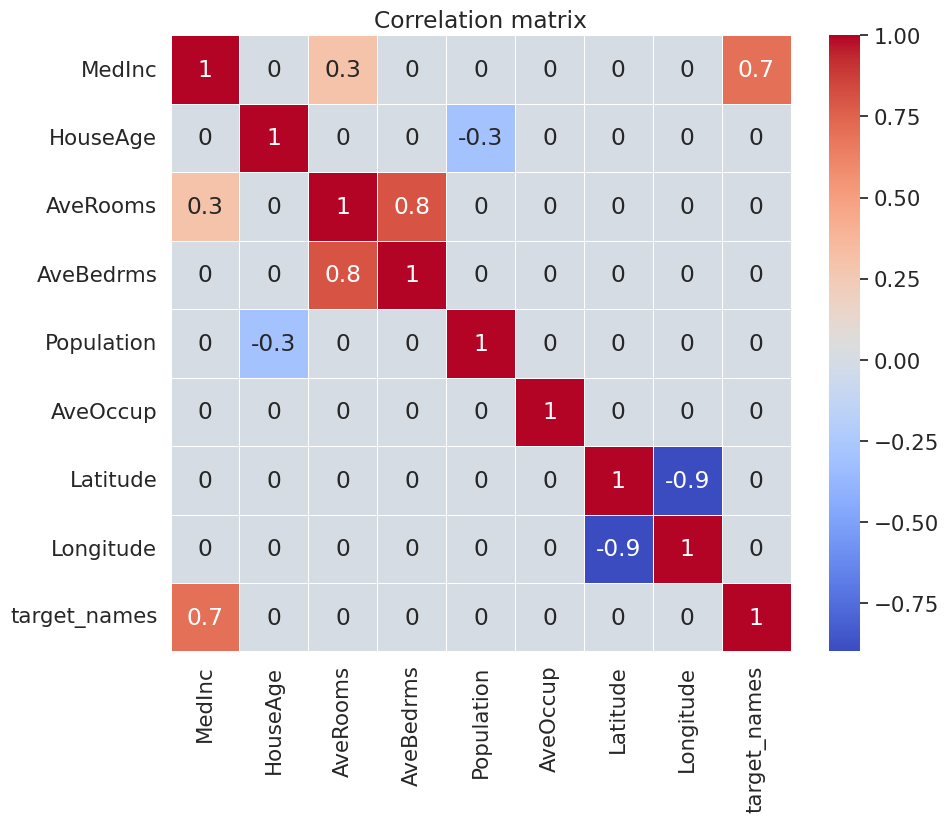

In [234]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')

### a. Сделайте выводы.

In [235]:
# судя по всему из-за выброса матрица получается искаженной, хотя она мне не очень понятна

### b. Удалите признаки на основании полученных значений, выводов.

In [236]:
data2 = df[data1['median_house_value'] < 499999]
data2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_names
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


### c. Повторите п. 3, п. 4 на измененных данных.

In [238]:
X2 = data2

In [239]:
Y2 = data2['target_names']

In [240]:
data2 = pd.DataFrame(X2, columns=features)
data2['target_names'] = Y2

data2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_names
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


In [241]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()
lr2.fit(X2, Y2)

LinearRegression()

In [242]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=0)

In [244]:
pred2 = lr2.predict(X2)

In [245]:
pred_df2 = pd.DataFrame({
    'ground truth': Y2,
    'prediction': pred2
})

pred_df2

,ground truth,prediction
0,452600.0,452600.0
1,358500.0,358500.0
2,352100.0,352100.0
3,341300.0,341300.0
4,342200.0,342200.0
...,...,...
20635,78100.0,78100.0
20636,77100.0,77100.0
20637,92300.0,92300.0
20638,84700.0,84700.0


In [272]:
rmse2 = np.sqrt(mean_squared_error(pred_df2['ground truth'], pred_df2['prediction']))
rmse2

5.492240478383265e-11

In [248]:
r2_score_2 = r2_score(pred_df2['ground truth'], pred_df2['prediction'])
r2_score_2

1.0

## 7 Исследуйте оставленные признаки на выбросы.

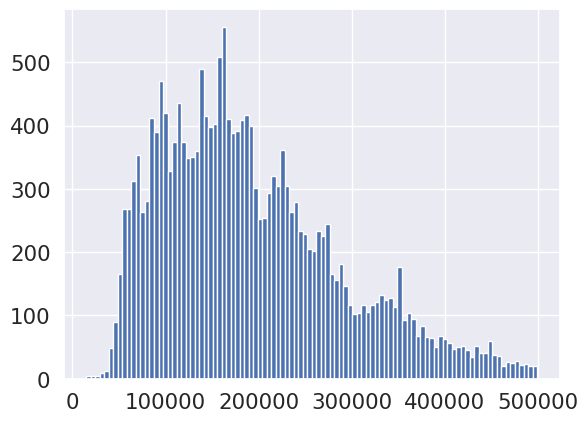

In [250]:
data2['target_names'].hist(bins=100)
plt.show()

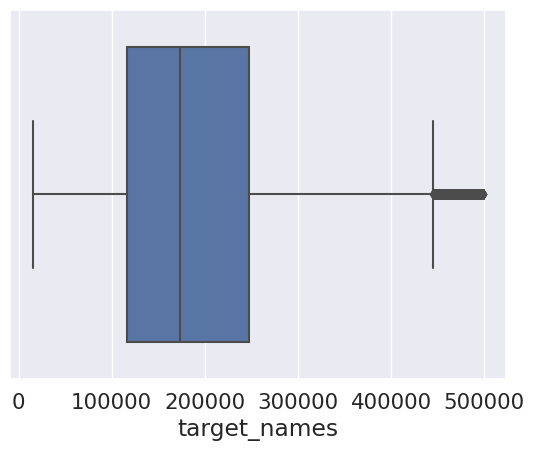

In [251]:
get_boxplot(data2, columns=['target_names'])

### a. Удалите выбросы в случае обнаружения.

In [ ]:
# судя по всему есть выброс больше где-то 450 000

### b. Повторите п. 3, п. 4 на измененных данных.

In [255]:
data3 = df[data1['median_house_value'] < 450000]
data3.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_names
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,269700.0


In [257]:
X3 = data3

In [258]:
Y3 = data3['target_names']

In [259]:
data3 = pd.DataFrame(X3, columns=features)
data3['target_names'] = Y3

data3.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_names
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,269700.0


In [260]:
from sklearn.linear_model import LinearRegression

lr3 = LinearRegression()
lr3.fit(X3, Y3)

LinearRegression()

In [261]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=0)

In [262]:
pred3 = lr3.predict(X3)

In [263]:
pred_df3 = pd.DataFrame({
    'ground truth': Y3,
    'prediction': pred3
})

pred_df3

,ground truth,prediction
1,358500.0,358500.0
2,352100.0,352100.0
3,341300.0,341300.0
4,342200.0,342200.0
5,269700.0,269700.0
...,...,...
20635,78100.0,78100.0
20636,77100.0,77100.0
20637,92300.0,92300.0
20638,84700.0,84700.0


In [271]:
rmse3 = np.sqrt(mean_squared_error(pred_df3['ground truth'], pred_df3['prediction']))
rmse3

2.4660206317484574e-11

In [265]:
r2_score_3 = r2_score(pred_df3['ground truth'], pred_df3['prediction'])
r2_score_3

1.0

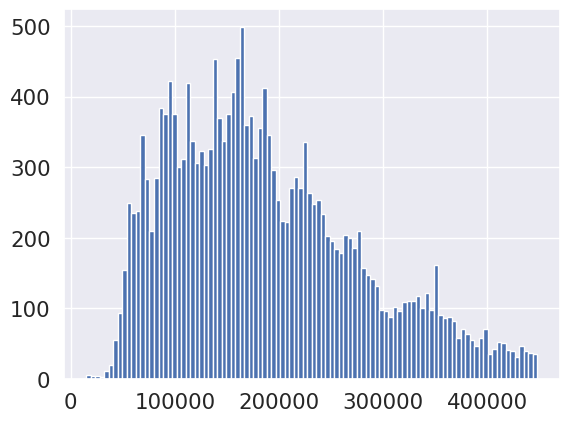

In [266]:
data3['target_names'].hist(bins=100)
plt.show()

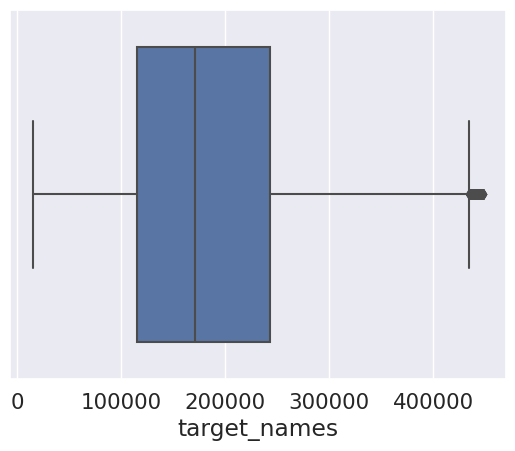

In [267]:
get_boxplot(data3, columns=['target_names'])

## 8 Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

##### Вопрос:
Какой датасет нужно редактировать?

Последний или первый с выбросами?

И что будет, если к каждому признаку применять разные математические преобразования?

Ведь каждый раз результаты будут совершенно разными и возможно даже удивительно странными :)

In [281]:
data4 = abs(data3).apply(np.sqrt)
data4.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_names
1,2.881215,4.582576,2.497626,0.985840,49.000000,1.452529,6.153048,11.055315,598.748695
2,2.693956,7.211103,2.878912,1.036073,22.271057,1.673995,6.152235,11.056220,593.380148
3,2.375521,7.211103,2.411919,1.035886,23.622024,1.596228,6.152235,11.056672,584.208867
4,1.961173,7.211103,2.506363,1.039750,23.769729,1.476979,6.152235,11.056672,584.978632
5,2.009179,7.211103,2.182122,1.050537,20.322401,1.462838,6.152235,11.056672,519.326487


##### тут меняется Longitude (долгота) - много отрицательных значений, значит точно повлияет на результат

### a. Повторите п. 3, п. 4 на измененных данных.

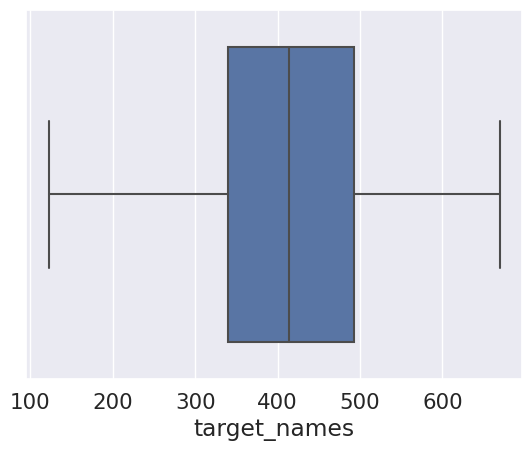

In [282]:
get_boxplot(data4, columns=['target_names']) # в цене выбросов нет, но могут быть в других параметрах

In [283]:
X4 = data4

In [284]:
Y4 = data4['target_names']

In [285]:
data4 = pd.DataFrame(X4, columns=features)
data4['target_names'] = Y4

data4.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_names
1,2.881215,4.582576,2.497626,0.985840,49.000000,1.452529,6.153048,11.055315,598.748695
2,2.693956,7.211103,2.878912,1.036073,22.271057,1.673995,6.152235,11.056220,593.380148
3,2.375521,7.211103,2.411919,1.035886,23.622024,1.596228,6.152235,11.056672,584.208867
4,1.961173,7.211103,2.506363,1.039750,23.769729,1.476979,6.152235,11.056672,584.978632
5,2.009179,7.211103,2.182122,1.050537,20.322401,1.462838,6.152235,11.056672,519.326487


In [286]:
from sklearn.linear_model import LinearRegression

lr4 = LinearRegression()
lr4.fit(X4, Y4)

LinearRegression()

In [287]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y4, test_size=0.2, random_state=0)

In [288]:
pred4 = lr4.predict(X4)

In [289]:
pred_df4 = pd.DataFrame({
    'ground truth': Y4,
    'prediction': pred4
})

pred_df4

,ground truth,prediction
1,598.748695,598.748695
2,593.380148,593.380148
3,584.208867,584.208867
4,584.978632,584.978632
5,519.326487,519.326487
...,...,...
20635,279.463772,279.463772
20636,277.668868,277.668868
20637,303.809151,303.809151
20638,291.032644,291.032644


In [290]:
rmse4 = np.sqrt(mean_squared_error(pred_df4['ground truth'], pred_df4['prediction']))
rmse4

8.988744080776425e-14

In [291]:
r2_score_4 = r2_score(pred_df4['ground truth'], pred_df4['prediction'])
r2_score_4

1.0

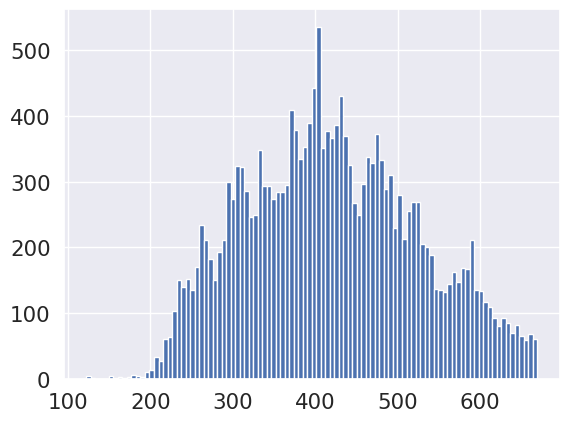

In [292]:
data4['target_names'].hist(bins=100)
plt.show()

In [ ]:
# можно было бы удалить один из выбросов, тот, что практически в центре

## 9 Сформулируйте выводы по проделанной работе.

#### Выводы:
Можно много раз убирать выбросы на одной метрике и показатели уже будут разными, но в целом добиться улучшения каества можно.

### a. Кратко опишите какие преобразования были сделаны с данными.

#### Сделанные преобразования:
удалялись выбросы в цене жилья и после переобучения модели считались метрики

### b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.

In [293]:
(rmse1,
r2_score1,
rmse2,
r2_score_2,
rmse3,
r2_score_3,
rmse4,
r2_score_4)

(72410.01216576387,
 0.606232685199805,
 5.492240478383265e-11,
 1.0,
 2.4660206317484574e-11,
 1.0,
 8.988744080776425e-14,
 1.0)

### c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

#### Мнение
если честно мне не совсем понятно, получилось ли улучшить метрику, хотя r2_score увеличилась, а потом уменьшилась.

rmse3 уже на втором шаге стала равной 1.

Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.

### Результат:
Получены знания по проведению разведочного анализа данных.

Форма выполнения:

Ссылка на Jupyter Notebook, загруженный на GitHub

Ссылка на Google Colab

Файл с расширением .ipynb

Инструменты:

Библиотека sklearn.datasets

Jupyter Notebook/Google Colab

GitHub

*Рекомендации к выполнению:

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.

У графиков должен быть заголовок, подписи осей, легенда (опционально).
Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.

Убедитесь, что по ссылкам есть доступ на чтение/просмотр.

Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.